# Data Exploration and Data Cleaning

In [30]:
import pandas as pd
import numpy as np

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import autocorrelation_plot

# Machine Learning Phase
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


#Metrics Libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


pd.set_option('display.max_columns', None)

In [31]:

df = pd.read_csv('UCI_Credit_Card.csv')

In [32]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [33]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [34]:
df = df.rename(columns={'PAY_0': 'PAY_1'})

In [35]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_1                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [37]:
categorical_features = [
    'SEX',
    'EDUCATION',
    'MARRIAGE',
    'PAY_1',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6',
    'default.payment.next.month'
]

df[categorical_features].describe()

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,0.221200
std,0.489129,0.790349,0.521970,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,0.415062
min,1.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000
25%,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,6.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000


In [38]:
df['MARRIAGE'] = df['MARRIAGE'].apply(lambda x: 3 if x == 0 else x)

# Fixing education
df['EDUCATION'] = df['EDUCATION'].apply(lambda x: 4 if x in [0, 5, 6] else x)

df[categorical_features].describe()

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.842267,1.557267,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,0.221200
std,0.489129,0.744494,0.521405,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,0.415062
min,1.000000,1.000000,1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000
25%,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,4.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000


In [39]:
numerical_features = [
    'LIMIT_BAL', 
    'AGE', 
    'BILL_AMT1', 
    'BILL_AMT2', 
    'BILL_AMT3', 
    'BILL_AMT4', 
    'BILL_AMT5', 
    'BILL_AMT6', 
    'PAY_AMT1', 
    'PAY_AMT2', 
    'PAY_AMT3', 
    'PAY_AMT4', 
    'PAY_AMT5', 
    'PAY_AMT6'
]

df[numerical_features].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


# Data Analysis

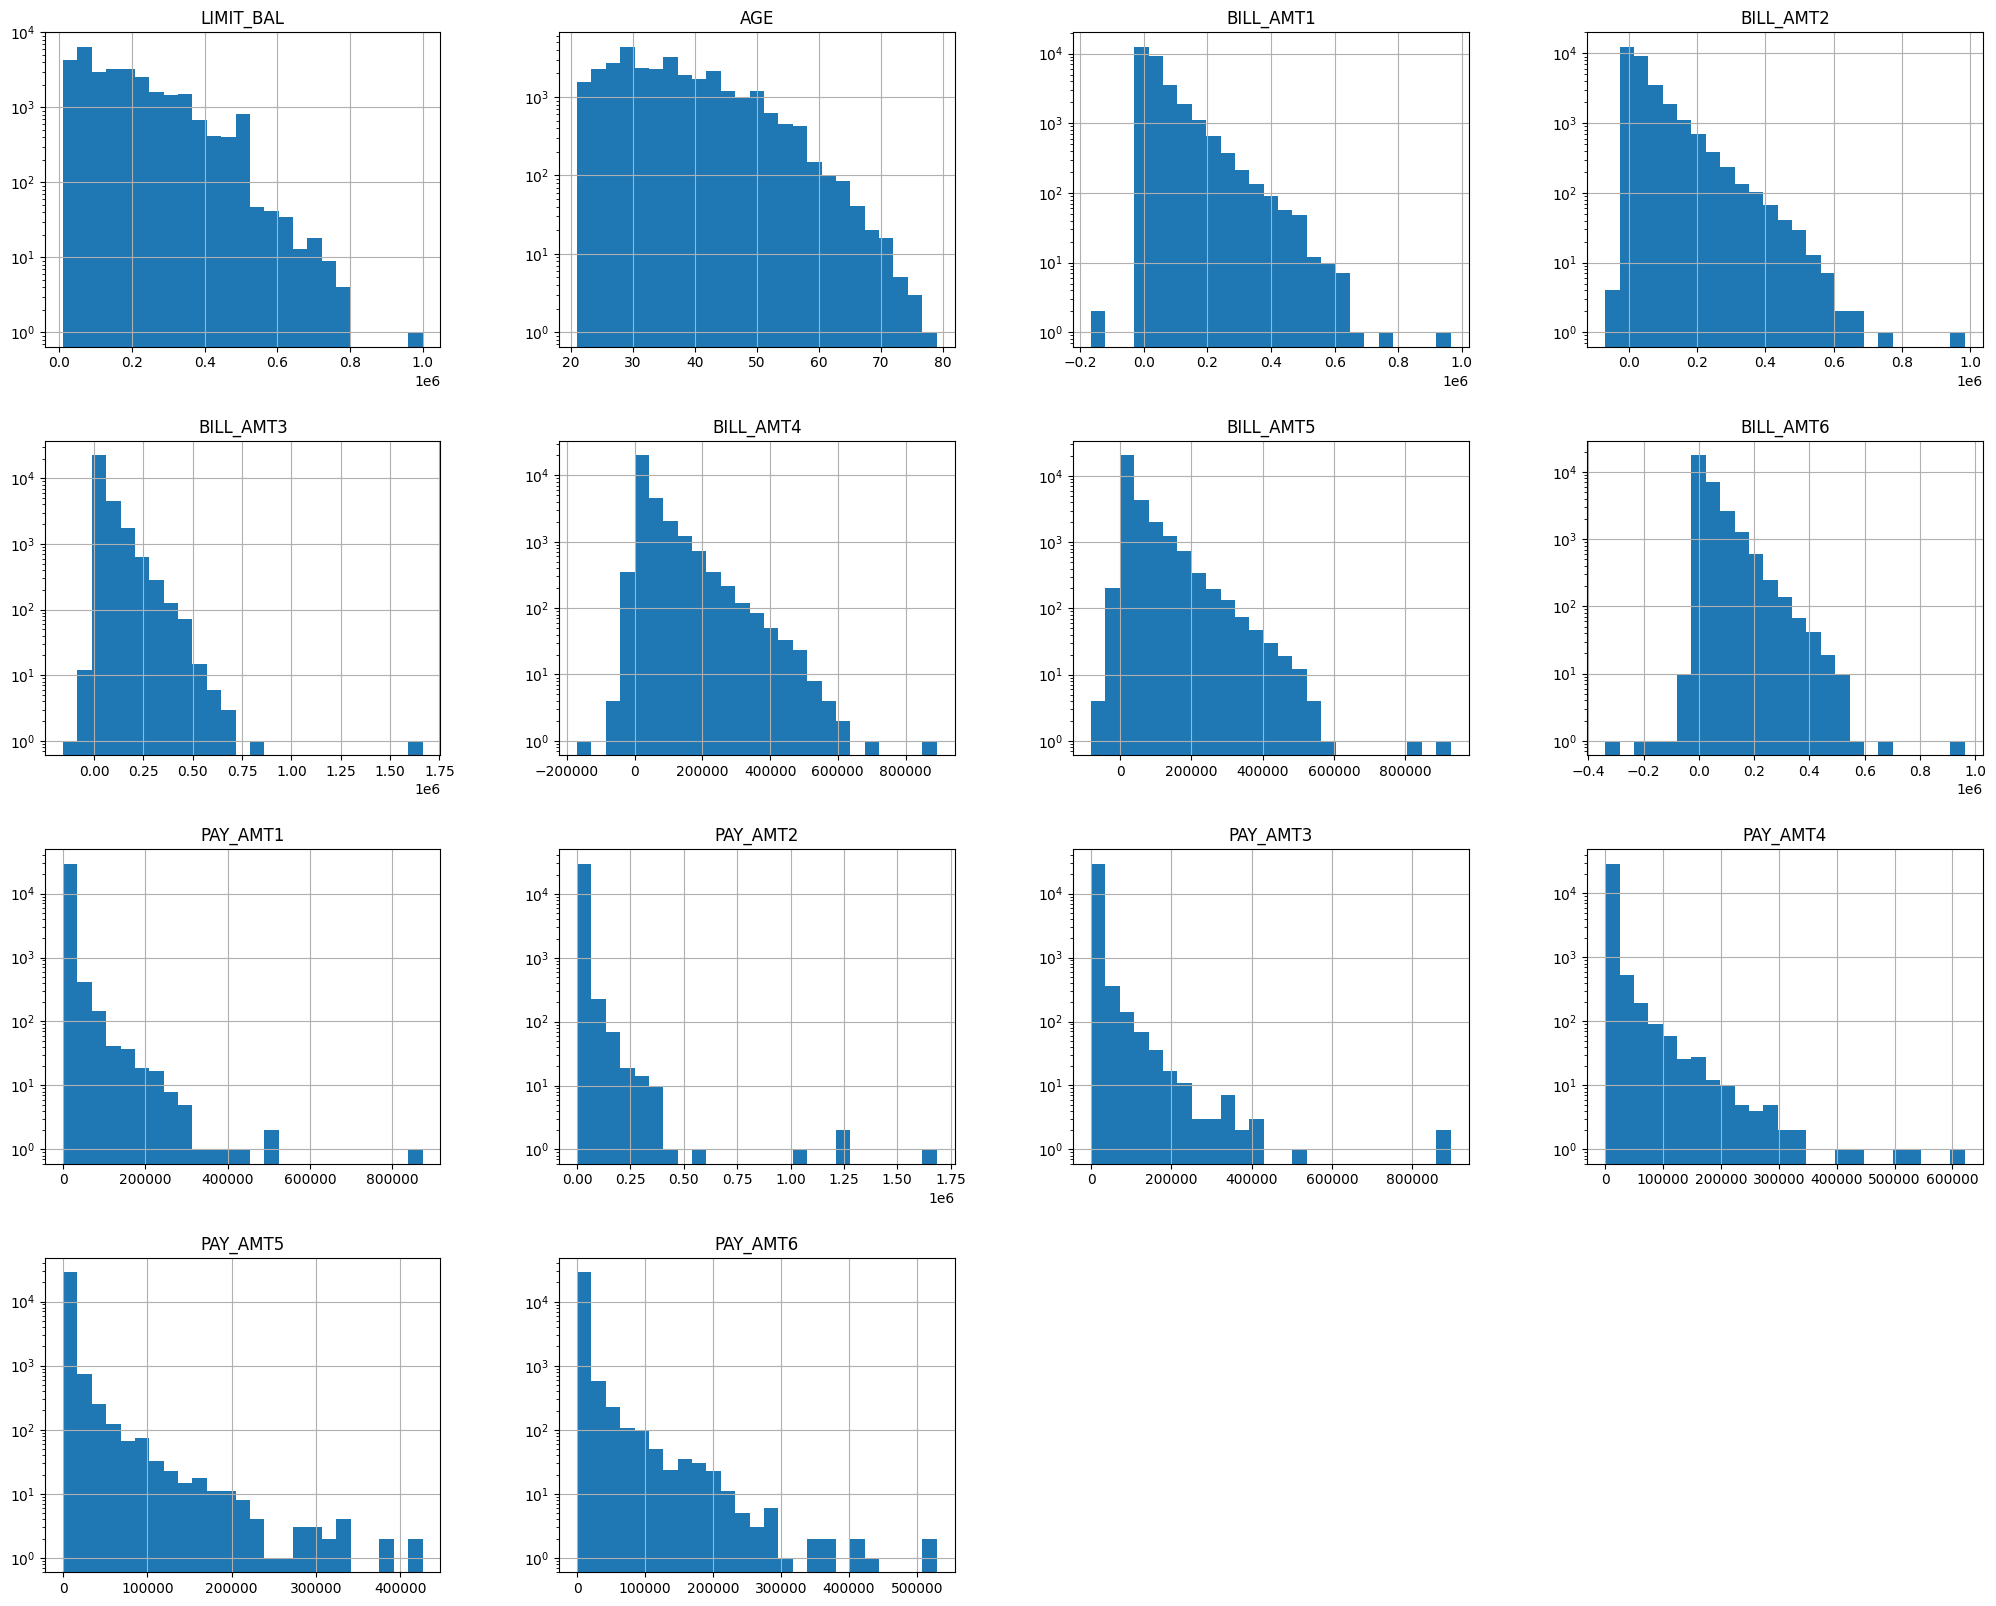

In [40]:
fig = plt.figure(figsize=(25,20))
ax = fig.gca()
# Showing with log on y axis to better visualise all values
df[numerical_features].hist(bins=25, ax=ax, log=True);

# Analysis of DEFAULT PAYMENT

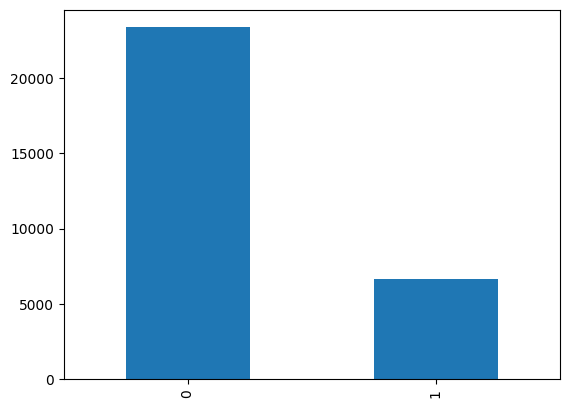

In [41]:
df['default.payment.next.month'].value_counts().plot(kind='bar');

0    77.88
1    22.12
Name: default.payment.next.month, dtype: float64


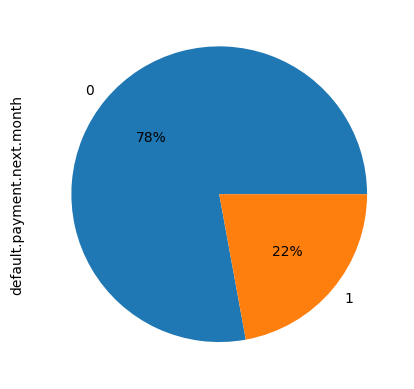

In [42]:
print(pd.value_counts(df['default.payment.next.month']) / len(df) * 100)
pd.value_counts(df['default.payment.next.month']).plot(kind='pie', y='default.payment.next.month', autopct='%1.0f%%');

In [43]:
default_baseline = len(df[df['default.payment.next.month'] == 1]) / len(df) * 100

# Analysis of gender

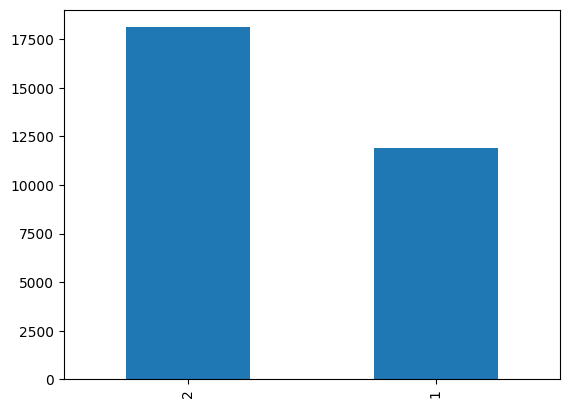

In [44]:
df['SEX'].value_counts().plot(kind='bar');

2    60.373333
1    39.626667
Name: SEX, dtype: float64


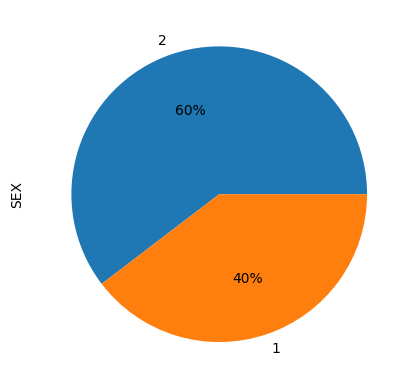

In [45]:
print(pd.value_counts(df['SEX']) / len(df) * 100)
pd.value_counts(df['SEX']).plot(kind='pie', y='SEX', autopct='%1.0f%%');

SEX   
1    1    24.167227
2    1    20.776281
Name: default.payment.next.month, dtype: float64
3.3909459999999996


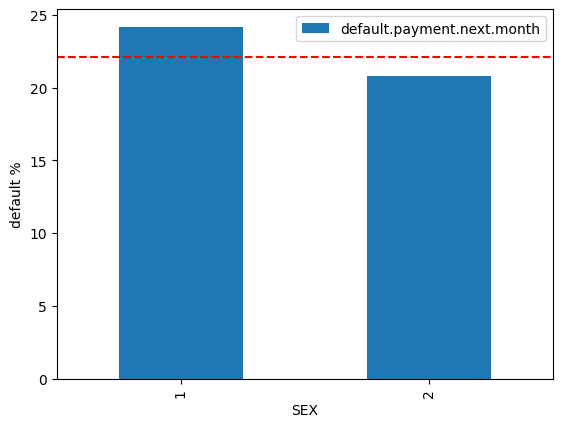

In [46]:
val_counts = df.groupby('SEX')['default.payment.next.month'].apply(lambda group: group.value_counts() / len(group) * 100)
print(val_counts[val_counts.index.get_level_values(1) == 1])
val_counts[val_counts.index \
           .get_level_values(1) == 1] \
           .reset_index(level=1) \
           .drop(columns='level_1') \
           .plot(kind='bar', ylabel='default %');
plt.axhline(y=default_baseline, color='r', linestyle='--');

print(24.167227 - 20.776281)

In [47]:
# In this cell, we test for statistical difference.
val = df.groupby('SEX')['default.payment.next.month'].apply(lambda group: group.value_counts())

n1 = val[1].sum()
n2 = val[2].sum()
p1 = val[1, 1] / n1
p2 = val[2, 1] / n2
p = ((n1 * p1) + (n2 * p2)) / val.sum()

from scipy.stats import binomtest

result = binomtest(val[1, 1], n=n1, p=p, alternative='less')
result.pvalue

0.9999999519510756

# Analysis of Education


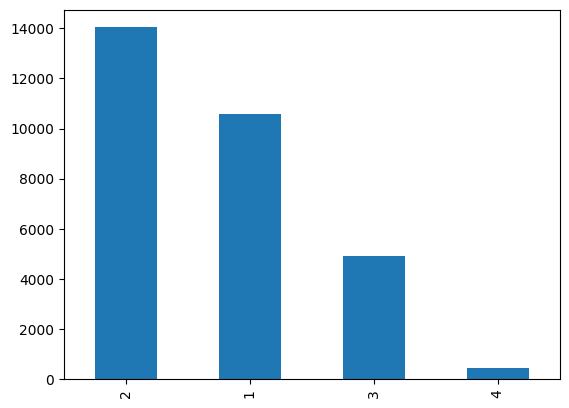

In [48]:
df['EDUCATION'].value_counts().plot(kind='bar');

2    46.766667
1    35.283333
3    16.390000
4     1.560000
Name: EDUCATION, dtype: float64


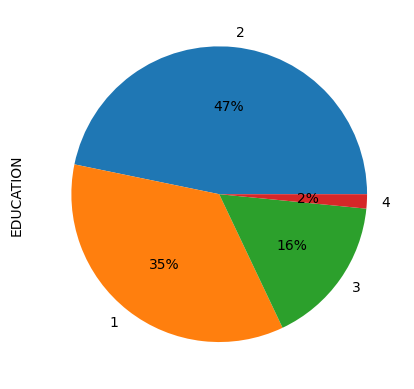

In [49]:
print(pd.value_counts(df['EDUCATION']) / len(df) * 100)
pd.value_counts(df['EDUCATION']).plot(kind='pie', y='EDUCATION', autopct='%1.0f%%');

EDUCATION   
1          1    19.234766
2          1    23.734854
3          1    25.157616
4          1     7.051282
Name: default.payment.next.month, dtype: float64


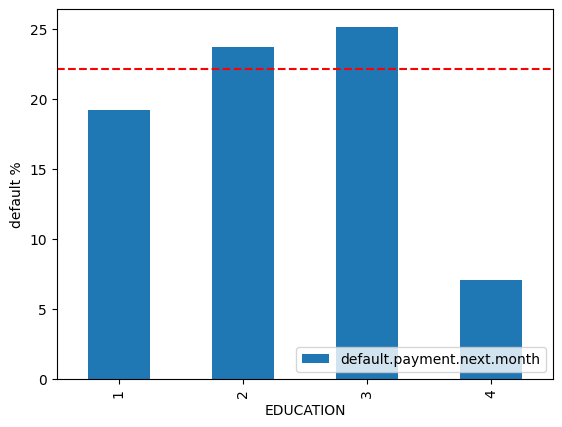

In [50]:
val_counts = df.groupby('EDUCATION')['default.payment.next.month'].apply(lambda group: group.value_counts() / len(group) * 100)
print(val_counts[val_counts.index.get_level_values(1) == 1])
val_counts[val_counts.index \
           .get_level_values(1) == 1] \
           .reset_index(level=1) \
           .drop(columns='level_1') \
           .plot(kind='bar', ylabel='default %');
plt.axhline(y=default_baseline, color='r', linestyle='--');
plt.legend(loc='lower right');

# Analysis of MARRIAGE

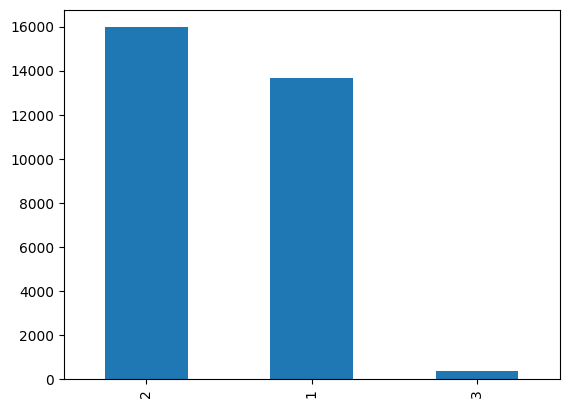

In [51]:
df['MARRIAGE'].value_counts().plot(kind='bar');

2    53.213333
1    45.530000
3     1.256667
Name: MARRIAGE, dtype: float64


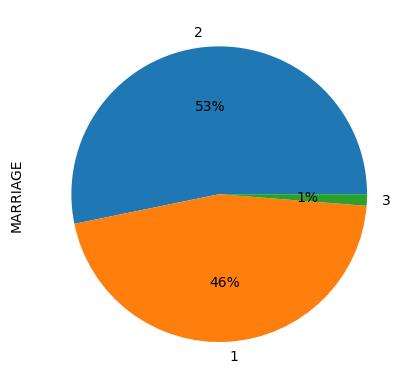

In [52]:
print(pd.value_counts(df['MARRIAGE']) / len(df) * 100)
pd.value_counts(df['MARRIAGE']).plot(kind='pie', y='MARRIAGE', autopct='%1.0f%%');

MARRIAGE   
1         1    23.471704
2         1    20.928339
3         1    23.607427
Name: default.payment.next.month, dtype: float64


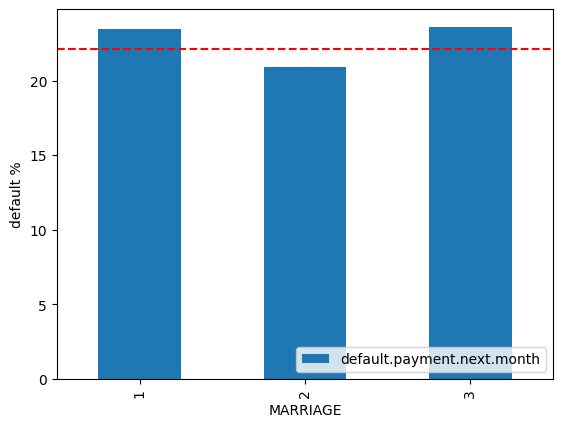

In [53]:
val_counts = df.groupby('MARRIAGE')['default.payment.next.month'].apply(lambda group: group.value_counts() / len(group) * 100)
print(val_counts[val_counts.index.get_level_values(1) == 1])
val_counts[val_counts.index \
           .get_level_values(1) == 1] \
           .reset_index(level=1) \
           .drop(columns='level_1') \
           .plot(kind='bar', ylabel='default %');
plt.axhline(y=default_baseline, color='r', linestyle='--');
plt.legend(loc='lower right');

# Analysis of PAY_X

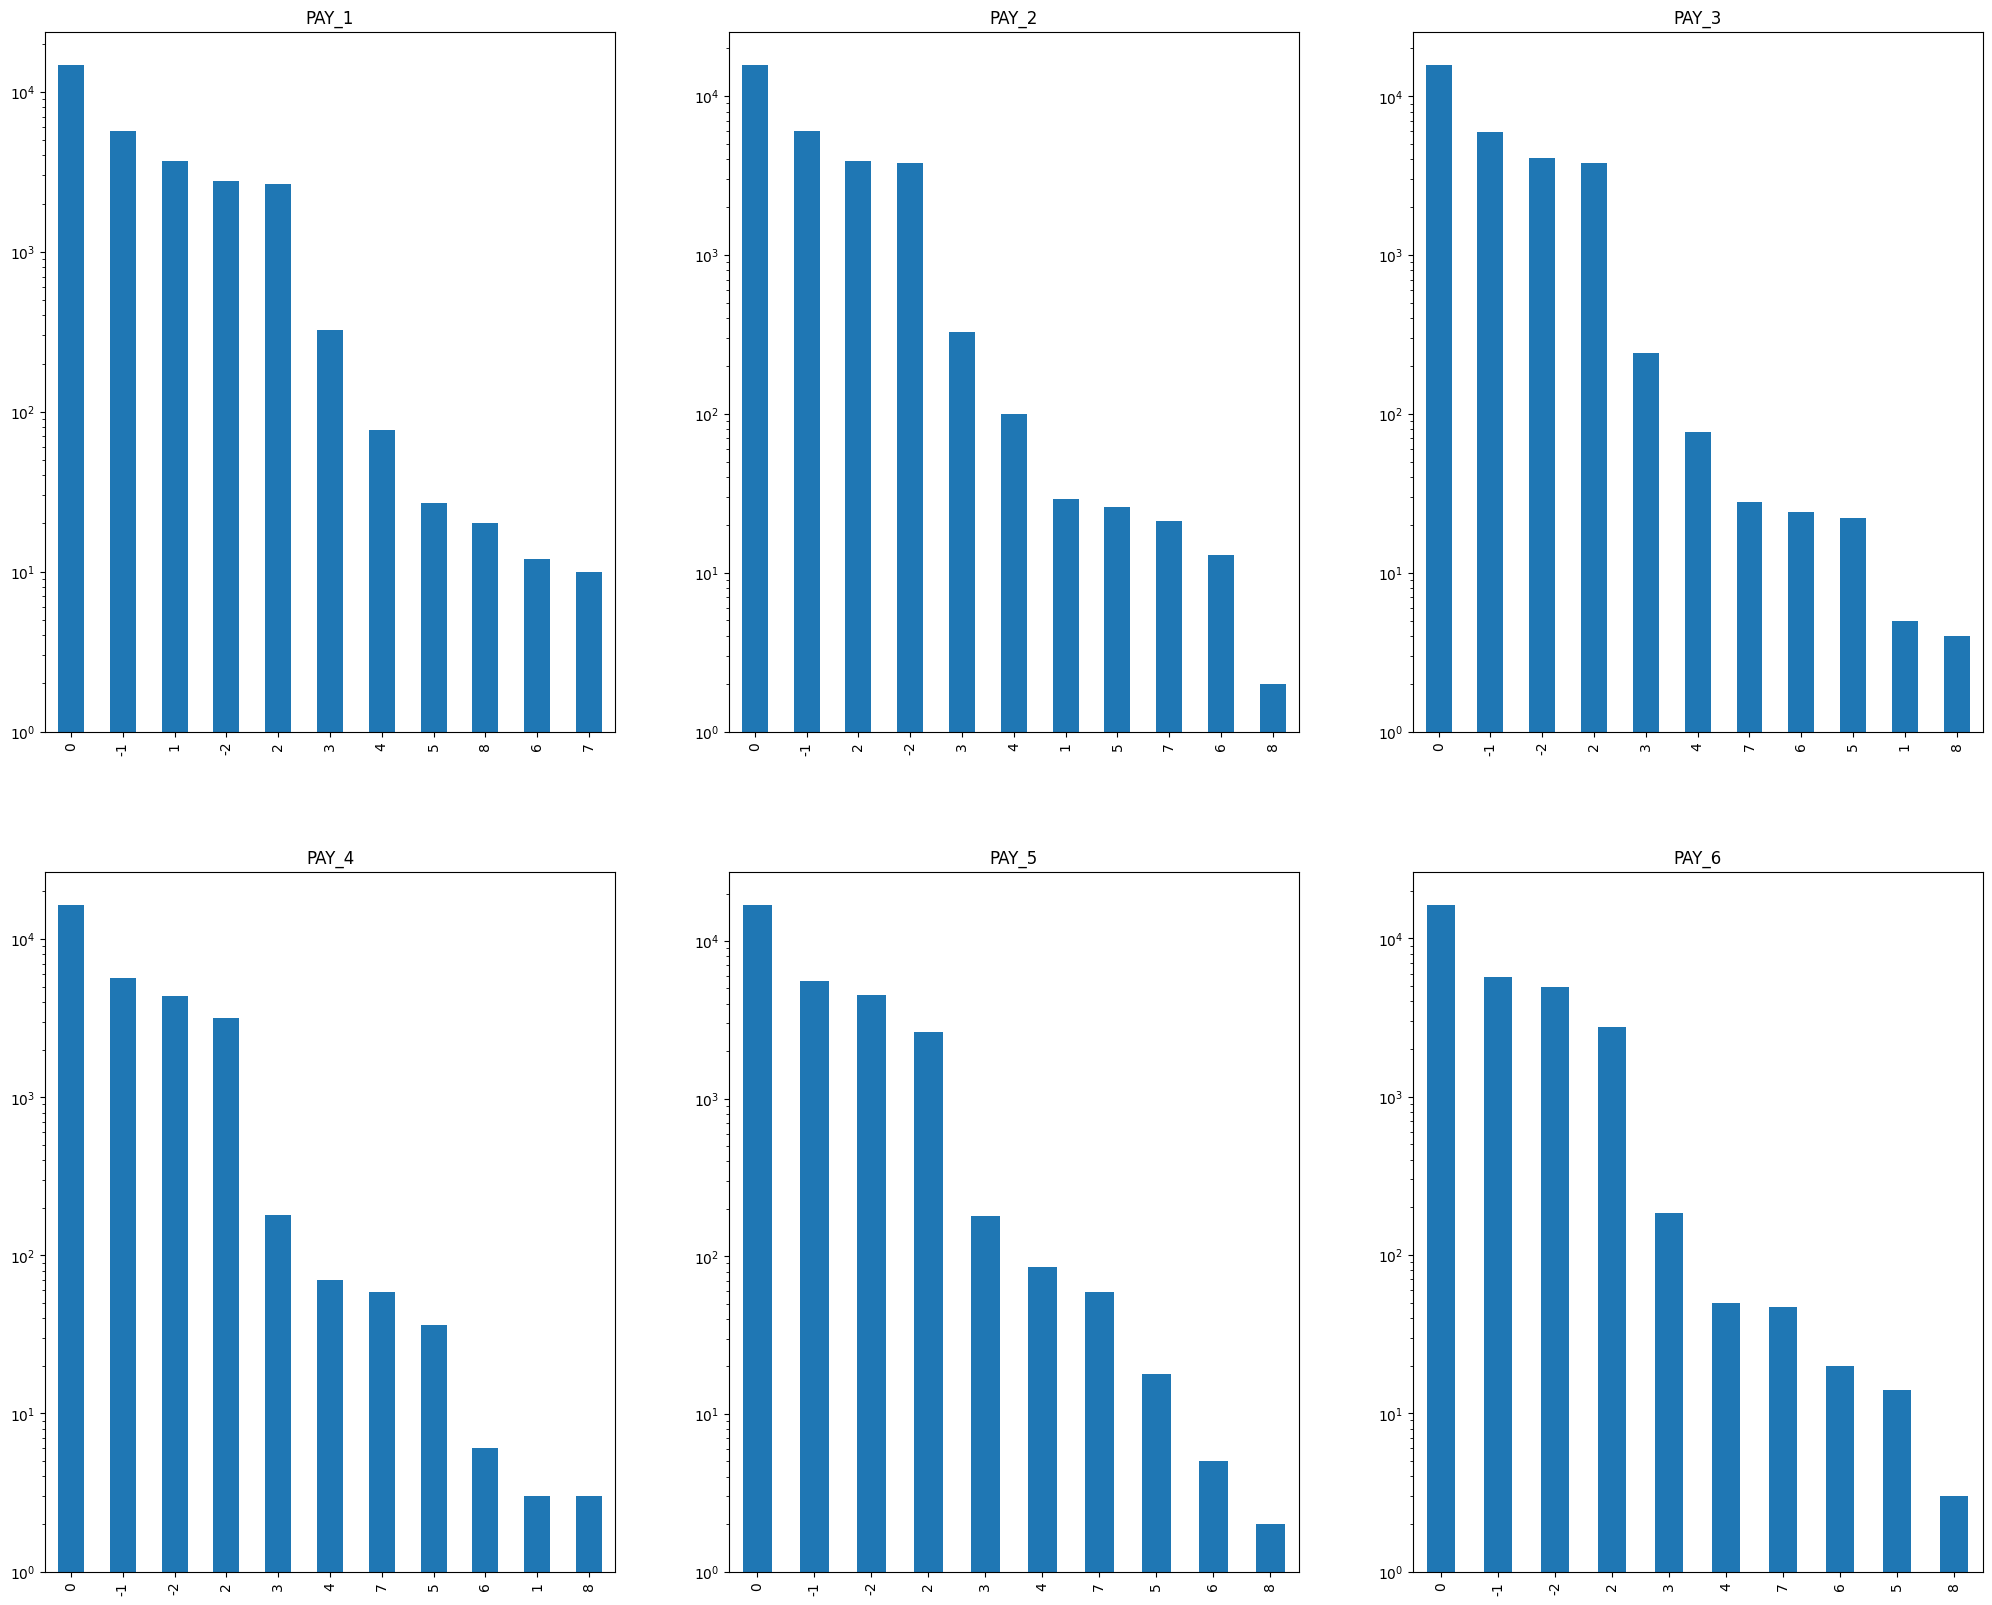

In [54]:
fig = plt.figure(figsize = (25,20))

counter = 1
for feature_name in categorical_features[3:-1]:
  ax = fig.add_subplot(2, 3, counter)
  df[feature_name].value_counts().plot(kind='bar', ax=ax, title=feature_name, log=True)
  counter += 1

plt.show()

 0    49.123333
-1    18.953333
 1    12.293333
-2     9.196667
 2     8.890000
 3     1.073333
 4     0.253333
 5     0.086667
 8     0.063333
 6     0.036667
 7     0.030000
Name: PAY_1, dtype: float64
 0    52.433333
-1    20.166667
 2    13.090000
-2    12.606667
 3     1.086667
 4     0.330000
 1     0.093333
 5     0.083333
 7     0.066667
 6     0.040000
 8     0.003333
Name: PAY_2, dtype: float64
 0    52.546667
-1    19.793333
-2    13.616667
 2    12.730000
 3     0.800000
 4     0.253333
 7     0.090000
 6     0.076667
 5     0.070000
 1     0.013333
 8     0.010000
Name: PAY_3, dtype: float64
 0    54.850000
-1    18.956667
-2    14.493333
 2    10.530000
 3     0.600000
 4     0.230000
 7     0.193333
 5     0.116667
 6     0.016667
 1     0.006667
 8     0.006667
Name: PAY_4, dtype: float64
 0    56.490000
-1    18.463333
-2    15.153333
 2     8.753333
 3     0.593333
 4     0.280000
 7     0.193333
 5     0.056667
 6     0.013333
 8     0.003333
Name: PAY_5, dtype: floa

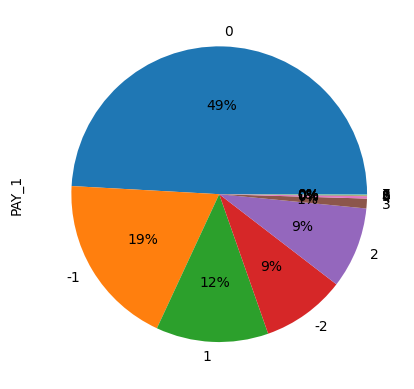

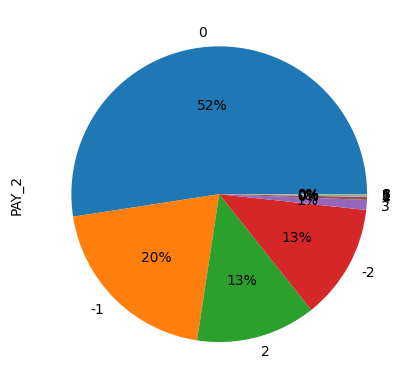

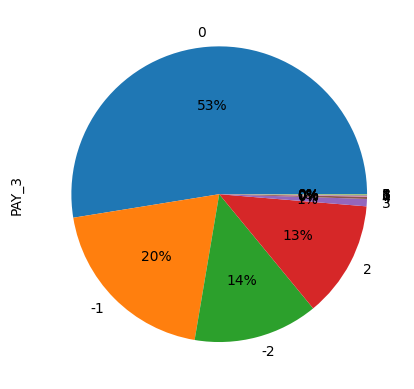

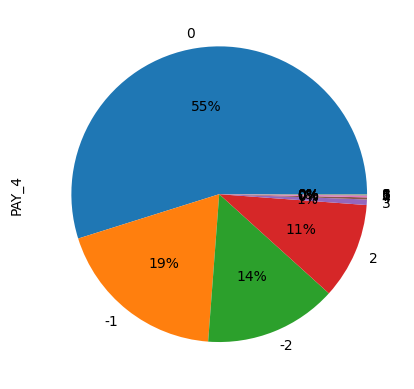

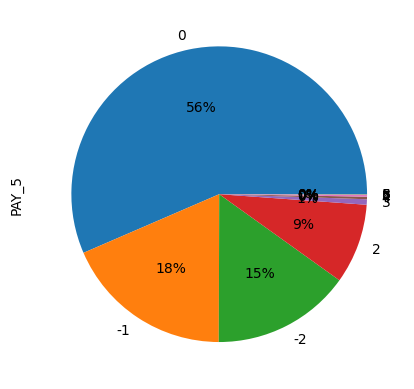

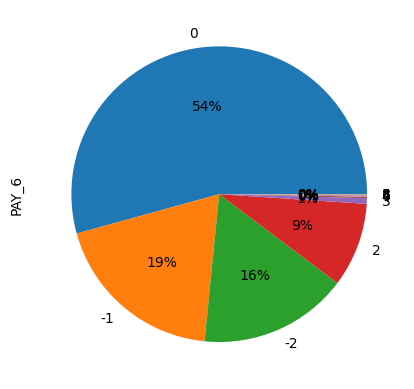

In [55]:
print(pd.value_counts(df['PAY_1']) / len(df) * 100)
print(pd.value_counts(df['PAY_2']) / len(df) * 100)
print(pd.value_counts(df['PAY_3']) / len(df) * 100)
print(pd.value_counts(df['PAY_4']) / len(df) * 100)
print(pd.value_counts(df['PAY_5']) / len(df) * 100)
print(pd.value_counts(df['PAY_6']) / len(df) * 100)
pd.value_counts(df['PAY_1']).plot(kind='pie', y='PAY_1', autopct='%1.0f%%');
plt.show()
pd.value_counts(df['PAY_2']).plot(kind='pie', y='PAY_2', autopct='%1.0f%%');
plt.show()
pd.value_counts(df['PAY_3']).plot(kind='pie', y='PAY_3', autopct='%1.0f%%');
plt.show()
pd.value_counts(df['PAY_4']).plot(kind='pie', y='PAY_4', autopct='%1.0f%%');
plt.show()
pd.value_counts(df['PAY_5']).plot(kind='pie', y='PAY_5', autopct='%1.0f%%');
plt.show()
pd.value_counts(df['PAY_6']).plot(kind='pie', y='PAY_6', autopct='%1.0f%%');
plt.show()

# pay 1

PAY_1   
-2     1    13.229431
-1     1    16.778051
 0     1    12.811291
 1     1    33.947939
 2     1    69.141357
 3     1    75.776398
 4     1    68.421053
 5     1    50.000000
 6     1    54.545455
 7     1    77.777778
 8     1    57.894737
Name: default.payment.next.month, dtype: float64


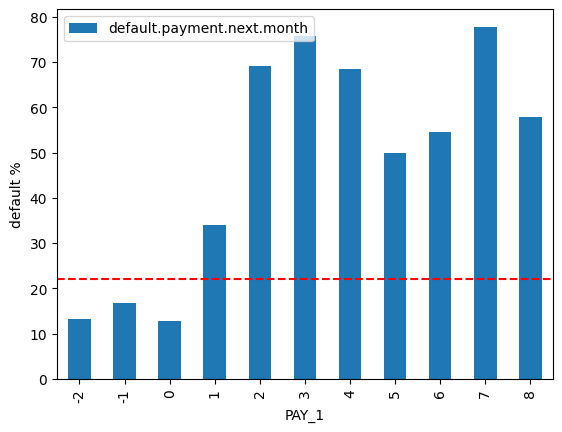

In [56]:
val_counts = df.groupby('PAY_1')['default.payment.next.month'].apply(lambda group: group.value_counts() / len(group) * 100)
print(val_counts[val_counts.index.get_level_values(1) == 1])
val_counts[val_counts.index \
           .get_level_values(1) == 1] \
           .reset_index(level=1) \
           .drop(columns='level_1') \
           .plot(kind='bar', ylabel='default %');
plt.axhline(y=default_baseline, color='r', linestyle='--');

# Visualization-EDA

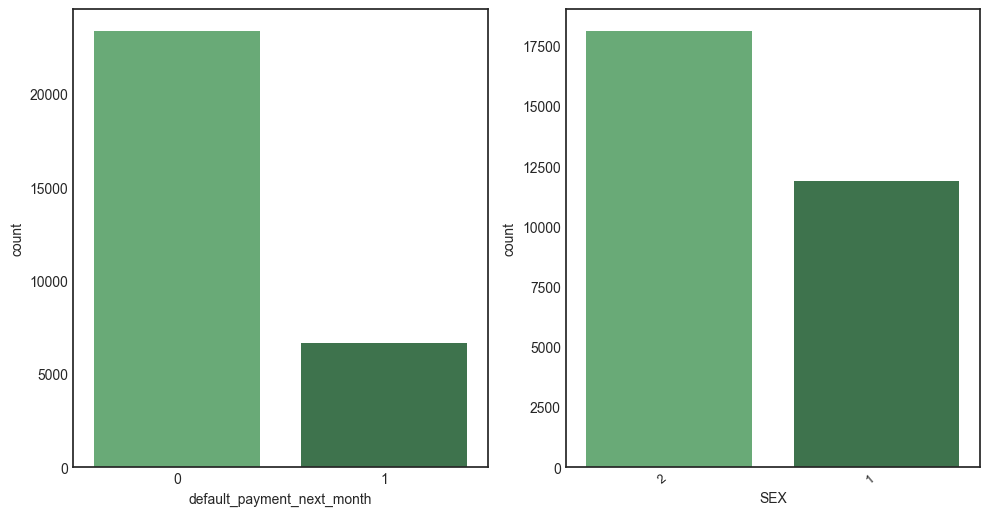

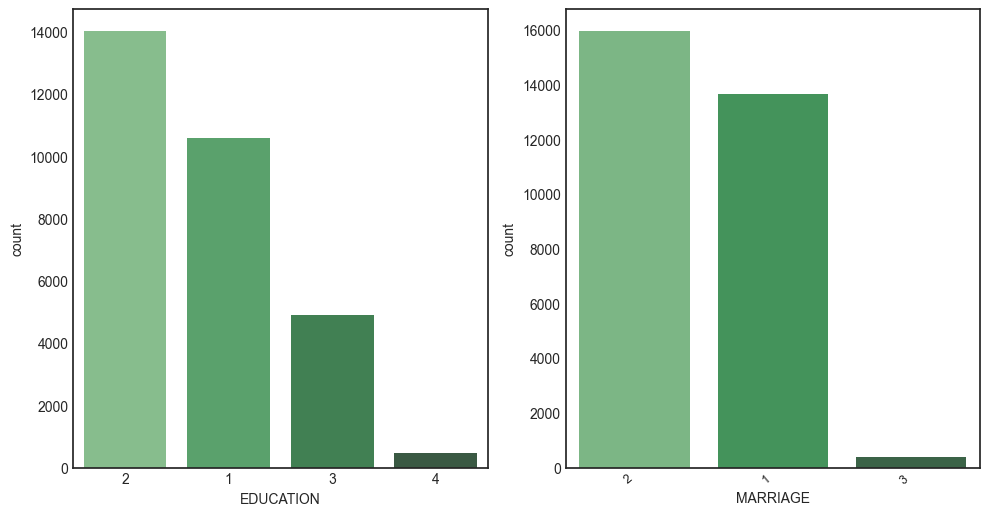

In [59]:
#Data preparation for EDA
df.rename(columns = {'default.payment.next.month':'default_payment_next_month'}, inplace = True)
demographics_card=df[['default_payment_next_month','SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
numerical_card=df[['LIMIT_BAL','PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]


plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

#Default payment category
plt.subplot(221)
sns.countplot(x="default_payment_next_month", data=demographics_card, palette="Greens_d",
              order=demographics_card.default_payment_next_month.value_counts().index)
fig = plt.gcf()
fig.set_size_inches(10,10)


#Gender category
plt.subplot(222)
ax=sns.countplot(x="SEX", data=demographics_card, palette="Greens_d",
              order=demographics_card.SEX.value_counts().iloc[:10].index)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.tight_layout()
plt.show()

#Education category
plt.subplot(223)
sns.countplot(x="EDUCATION", data=demographics_card, palette="Greens_d",
              order=demographics_card.EDUCATION.value_counts().index)
fig = plt.gcf()
fig.set_size_inches(10,10)

#Marraige category
plt.subplot(224)
ax=sns.countplot(x="MARRIAGE", data=demographics_card, palette="Greens_d",
              order=demographics_card.MARRIAGE.value_counts().iloc[:10].index)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

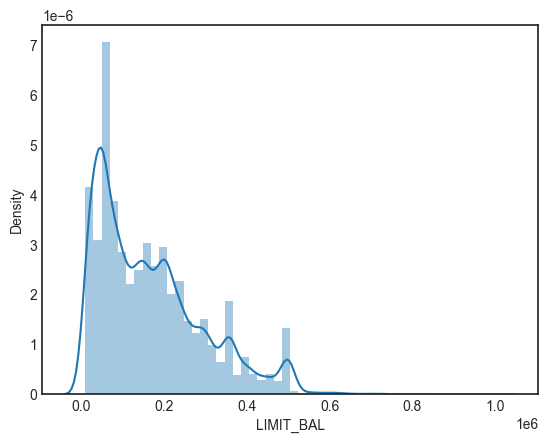

In [60]:
sns.distplot(numerical_card['LIMIT_BAL'])

# Data Preparation

In [61]:
df['payment_score']=df['PAY_1']+df['PAY_2']+df['PAY_3']+df['PAY_4']+df['PAY_5']+df['PAY_6']
df['bill_amt_score'] =df['payment_score']*df[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)

In [62]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,payment_score,bill_amt_score
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,-2,-2568.000000
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,3,8538.500000
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0.000000
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,0.000000
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,-2,-36446.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0,0.000000
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,-4,-14121.333333
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,8,93994.666667
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,-1,-44435.166667


In [64]:
X=df.drop(['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                         'BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                         'default_payment_next_month'],axis=1)
y=df.default_payment_next_month


X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (24000, 14)
Input Test: (6000, 14)
Output Training: (24000,)
Output Test: (6000,)


In [73]:
X

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,payment_score,bill_amt_score,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-2,PAY_1_-1,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,-1.136701,-1.245999,-0.642490,-0.647388,-0.667982,-0.672486,-0.663047,-0.652713,-0.341936,-0.227082,-0.296796,-0.308057,-0.314131,-0.293377,-2,-2568.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,-0.365974,-1.029030,-0.659208,-0.666735,-0.639244,-0.621626,-0.606219,-0.597956,-0.341936,-0.213584,-0.240001,-0.244226,-0.314131,-0.180875,3,8538.500000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,-0.597192,-0.161154,-0.298555,-0.493891,-0.482400,-0.449723,-0.417181,-0.391623,-0.250287,-0.191884,-0.240001,-0.244226,-0.248679,-0.012122,0,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,-0.905483,0.164300,-0.057490,-0.013292,0.032846,-0.232369,-0.186726,-0.156576,-0.221187,-0.169358,-0.228641,-0.237842,-0.244162,-0.237126,0,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,-0.905483,2.333990,-0.578608,-0.611308,-0.161186,-0.346991,-0.348131,-0.331476,-0.221187,1.335012,0.271161,0.266429,-0.269034,-0.255183,-2,-36446.333333,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,0.404752,0.381269,1.870348,2.018102,2.326651,0.695462,-0.149257,-0.384386,0.171247,0.611038,-0.012647,-0.113562,0.013131,-0.237126,0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,29997,-0.134756,0.815207,-0.672775,-0.665288,-0.627419,-0.532915,-0.577682,-0.652713,-0.231028,-0.103953,0.214252,-0.299823,-0.314131,-0.293377,-4,-14121.333333,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,

# Model Experimentation

# Preprocessing

In [66]:
# It does not seems to help models when we bin good and bad paying behaviour togheter
# for PAY_X in categorical_features[3:-1]:
#   df[PAY_X] = df[PAY_X].apply(lambda x: 0 if x in [-2, -1, 0] else 1)

# SVN of numerical features
df[numerical_features] = (df[numerical_features] - df[numerical_features].mean()) / df[numerical_features].std()

# One Hot Encoding of all categorical features since there is no ordinal feature
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(drop='if_binary')

one_hot_encoder_df = pd.DataFrame(one_hot_encoder.fit_transform(df[categorical_features[:-1]]).toarray(), index=df.index)
one_hot_encoder_df.columns = one_hot_encoder.get_feature_names_out(categorical_features[:-1])

df_prepro = df.copy().join(one_hot_encoder_df)
df_prepro = df_prepro.drop(columns=categorical_features[:-1])
df_prepro.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month', 'payment_score', 'bill_amt_score',
       'SEX_2', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_-2', 'PAY_1_-1',
       'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5',
       'PAY_1_6', 'PAY_1_7', 'PAY_1_8', 'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0',
       'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6',
       'PAY_2_7', 'PAY_2_8', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1',
       'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7',
       'PAY_3_8', 'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2',
       'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8',
       'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', '

In [67]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,payment_score,bill_amt_score
0,1,-1.136701,2,2,1,-1.245999,2,2,-1,-1,-2,-2,-0.642490,-0.647388,-0.667982,-0.672486,-0.663047,-0.652713,-0.341936,-0.227082,-0.296796,-0.308057,-0.314131,-0.293377,1,-2,-2568.000000
1,2,-0.365974,2,2,2,-1.029030,-1,2,0,0,0,2,-0.659208,-0.666735,-0.639244,-0.621626,-0.606219,-0.597956,-0.341936,-0.213584,-0.240001,-0.244226,-0.314131,-0.180875,1,3,8538.500000
2,3,-0.597192,2,2,2,-0.161154,0,0,0,0,0,0,-0.298555,-0.493891,-0.482400,-0.449723,-0.417181,-0.391623,-0.250287,-0.191884,-0.240001,-0.244226,-0.248679,-0.012122,0,0,0.000000
3,4,-0.905483,2,2,1,0.164300,0,0,0,0,0,0,-0.057490,-0.013292,0.032846,-0.232369,-0.186726,-0.156576,-0.221187,-0.169358,-0.228641,-0.237842,-0.244162,-0.237126,0,0,0.000000
4,5,-0.905483,1,2,1,2.333990,-1,0,-1,0,0,0,-0.578608,-0.611308,-0.161186,-0.346991,-0.348131,-0.331476,-0.221187,1.335012,0.271161,0.266429,-0.269034,-0.255183,0,-2,-36446.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,0.404752,1,3,1,0.381269,0,0,0,0,0,0,1.870348,2.018102,2.326651,0.695462,-0.149257,-0.384386,0.171247,0.611038,-0.012647,-0.113562,0.013131,-0.237126,0,0,0.000000
29996,29997,-0.134756,1,3,2,0.815207,-1,-1,-1,-1,0,0,-0.672775,-0.665288,-0.627419,-0.532915,-0.577682,-0.652713,-0.231028,-0.103953,0.214252,-0.299823,-0.314131,-0.293377,0,-4,-14121.333333
29997,29998,-1.059629,1,2,2,0.164300,4,3,2,-1,0,0,-0.647216,-0.643820,-0.638148,-0.347955,-0.324512,-0.327681,-0.341936,-0.256985,0.952709,-0.039964,-0.183226,-0.118999,1,8,93994.666667
29998,29999,-0.674265,1,3,1,0.598238,1,-1,0,0,0,-1,-0.717970,0.410262,0.422366,0.147841,-0.468055,0.169128,4.844235,-0.109031,-0.229891,-0.185117,3.152484,-0.191900,1,-1,-44435.166667


In [69]:
X = df_prepro.copy()
X = X.drop(columns=['default_payment_next_month'])
Y = df_prepro['default_payment_next_month'].copy()

# Test - train split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

 # Training

In [70]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
# Our dataset is slightly imbalanced 
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(Y), y=Y)

# Decision Tree

In [72]:
# Decision tree
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontree#sklearn.tree.DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

params = {
    'max_depth': [2, 3, 5, 6, 10, 20, 50],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=4, n_jobs=-1, verbose=1, refit='f1', scoring=['f1', 'accuracy'])

grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
clf = grid_search.best_estimator_.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print('Accuracy: {:.4f}'.format(accuracy_score(Y_test, y_pred)))
print('f1: {:.4f}'.format(f1_score(Y_test, y_pred)))

Fitting 4 folds for each of 70 candidates, totalling 280 fits
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}
Accuracy: 0.7423
f1: 0.5160
